<a href="https://colab.research.google.com/github/zekaemo/Implementasi-Regresi_Metode-Numerik/blob/main/Regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import curve_fit
from sklearn.model_selection import train_test_split


In [ ]:
# Menyiapkan data
df = pd.read_csv('Student_Performance.csv')

# Buang kolom yang tidak penting
df = df.drop(["Hours Studied", "Previous Scores", "Extracurricular Activities", "Sleep Hours"], axis=1)

# Mengubah kolom menjadi array
NL = df['Sample Question Papers Practiced'].values
NT = df['Performance Index'].values

x = NL.reshape(-1, 1)


In [ ]:
# Pembagian data set
NL_train, NL_test, NT_train, NT_test = train_test_split(x, NT, test_size=0.2, random_state=1)



In [ ]:
# Inisialisasi class model Power Law
class PowerLawModel:
    def __init__(self):
        self.params = None
        self.rms_error = None

    def fit(self, X, y):
        def power_law(x, a, b):
            return a * np.power(x, b)
        self.params, _ = curve_fit(power_law, X.flatten(), y, p0=[1, 1])

    def predict(self, X):
        a, b = self.params
        return a * np.power(X.flatten(), b)

    def calculate_rms_error(self, y_true, y_pred):
        self.rms_error = np.sqrt(mean_squared_error(y_true, y_pred))
        return self.rms_error

In [ ]:
# Melatih model
power_model = PowerLawModel()
power_model.fit(NL_train, NT_train)

# Make predictions with Power Law model
hasil_uji_power = power_model.predict(NL_test)

# Perhitungan RMS error
test_rms_error = power_model.calculate_rms_error(NT_test, hasil_uji_power)
test_rms_error

<ipython-input-30-25664a7b9d66>:9: RuntimeWarning: divide by zero encountered in power
  return a * np.power(x, b)


25.960431604432294

In [ ]:
# Calculate R-squared scores for Power Law model
r2_score_power = r2_score(NT_test, hasil_uji)
r2_score_power


-0.8371257354195636

In [ ]:

# Fit Linear Regression model
linreg = LinearRegression()
linreg.fit(NL_train, NT_train)

# uji
hasil_uji_linreg = linreg.predict(NL_test)



In [ ]:
# Calculate errors for Linear Regression model
test_rms_error_linear = np.sqrt(mean_squared_error(NT_test, hasil_uji_linreg))

# Calculate R-squared scores for Linear Regression model
test_r2_linear = r2_score(NT_test, hasil_uji_linreg)



In [ ]:
test_r2_linear

0.002725368039476539

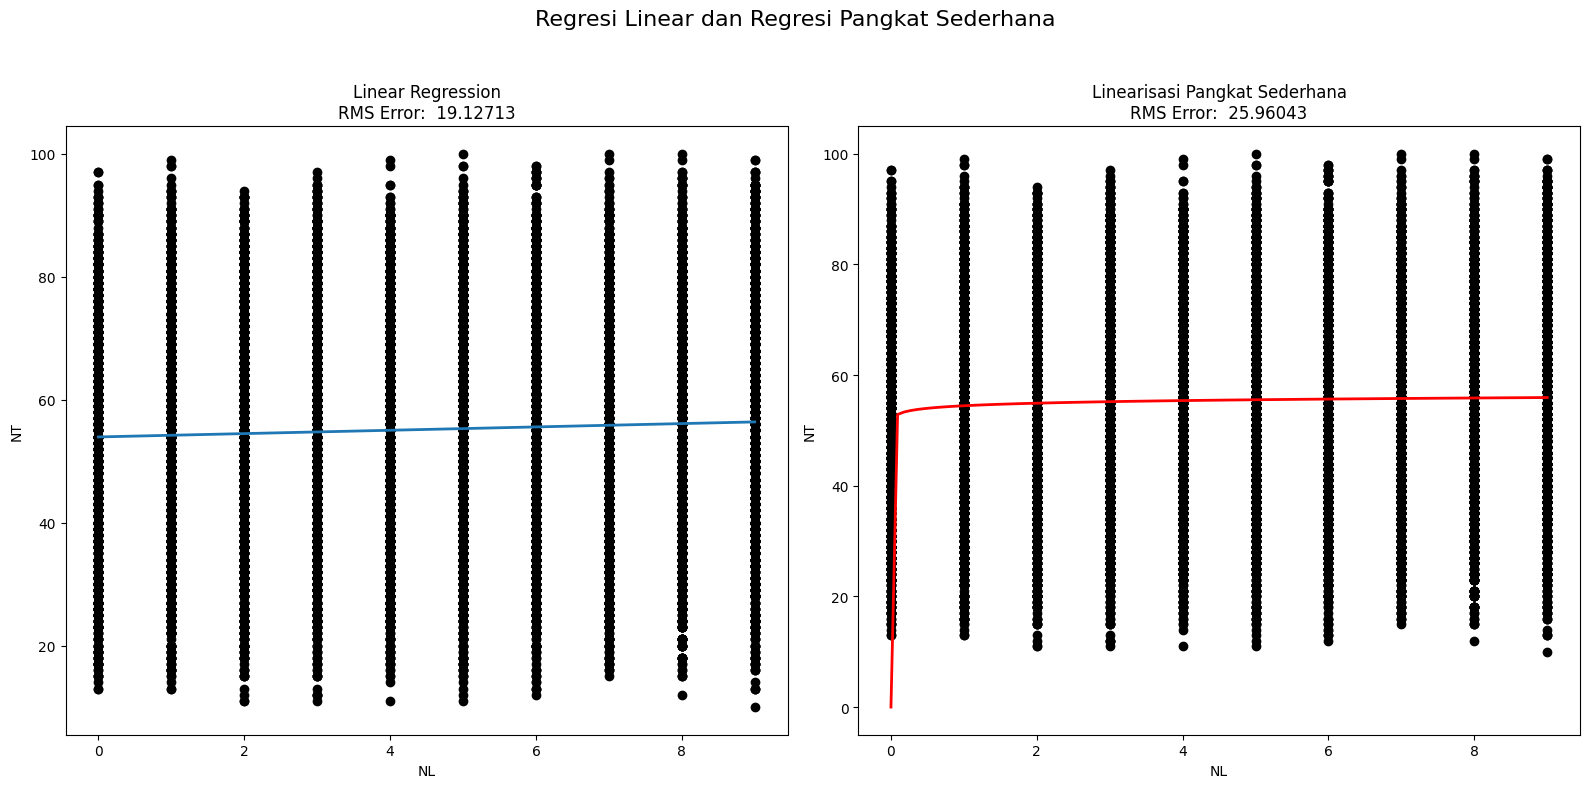

In [ ]:
# Plotting the results
plt.figure(figsize=(16, 8))


# visualisasi data linear
plt.subplot(1, 2, 1)
x_garis=np.linspace(0, 9, 100)
x_test=x_garis.reshape(-1, 1)
y_garis= linreg.predict(x_test)
plt.scatter(NL, NT, color='black')
plt.plot(x_garis, y_garis, linewidth=2)
plt.ylabel('NT')
plt.xlabel('NL')
plt.title(f'Linear Regression\nRMS Error: {test_rms_error_linear: .5f}')

# Visualisasi regresi pangkat sederhana
plt.subplot(1, 2, 2)
x_garis=np.linspace(0, 9, 100)
y_garis= power_model.predict(x_garis)
plt.scatter(NL, NT, color='black')
plt.plot(x_garis, y_garis, linewidth=2, color="red")
plt.ylabel('NT')
plt.xlabel('NL')
plt.title(f'Linearisasi Pangkat Sederhana\nRMS Error: {test_rms_error: .5f}')

plt.suptitle('Regresi Linear dan Regresi Pangkat Sederhana', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()
